In [1]:
# Import the dependencies.

import pandas as pd

import matplotlib.pyplot as plt

import numpy as np

from citipy import citipy

In [2]:
# Create a set of random latitude and longitude combinations.

lats = np.random.uniform(low=-90.000, high=90.000, size=1500)

lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)

lat_lngs = zip(lats, lngs)

lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.

coordinates = list(lat_lngs)

In [4]:
# Create a list for holding the cities.

cities = []

# Identify the nearest city for each latitude and longitude combination.

for coordinate in coordinates:
    
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    
    if city not in cities:
        
        cities.append(city)

# Print the city count to confirm sufficient count.

len(cities)

613

In [5]:
# Import the requests library.

import requests

# Import the API key.

from config import weather_api_key

In [6]:
# Starting URL for Weather Map API Call.

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [7]:
# Import the time library and the datetime module from the datetime library 

import time

from datetime import datetime

In [8]:
# Create an empty list to hold the weather data.

city_data = []

# Print the beginning of the logging.

print("Beginning Data Retrieval     ")

print("-----------------------------")


# Create counters.

record_count = 1

set_count = 1

Beginning Data Retrieval     
-----------------------------


In [10]:
# Loop through all the cities in the list.

for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    
    if (i % 50 == 0 and i >= 50):
        
        set_count += 1
        
        record_count = 1
        
        time.sleep(60)

    # Create endpoint URL with each city.
    
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count.
    
    record_count += 1
    
# Run an API request for each of the cities.
    
    try:
        
        # Parse the JSON and retrieve data.
        
        city_weather = requests.get(city_url).json()
        
        # Parse out the needed data.
        
        city_lat = city_weather["coord"]["lat"]
        
        city_lng = city_weather["coord"]["lon"]
        
        city_max_temp = city_weather["main"]["temp_max"]
        
        city_humidity = city_weather["main"]["humidity"]
        
        city_clouds = city_weather["clouds"]["all"]
        
        city_wind = city_weather["wind"]["speed"]
        
        city_country = city_weather["sys"]["country"]
        
        # Convert the date to ISO standard.
        
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        
        # Append the city information into city_data list.
        
        city_data.append({"City": city.title(),
                          
                          "Lat": city_lat,
                          
                          "Lng": city_lng,
                          
                          "Max Temp": city_max_temp,
                          
                          "Humidity": city_humidity,
                          
                          "Cloudiness": city_clouds,
                          
                          "Wind Speed": city_wind,
                          
                          "Country": city_country,
                          
                          "Date": city_date})

# If an error is experienced, skip the city.
    
    except:
        
        print("City not found. Skipping...")
        
        pass

# Indicate that Data Loading is complete.

print("-----------------------------")

print("Data Retrieval Complete      ")

print("-----------------------------")

Processing Record 1 of Set 13 | mar del plata
Processing Record 2 of Set 13 | helong
Processing Record 3 of Set 13 | irricana
Processing Record 4 of Set 13 | khatanga
Processing Record 5 of Set 13 | praia da vitoria
Processing Record 6 of Set 13 | bredasdorp
Processing Record 7 of Set 13 | port alfred
Processing Record 8 of Set 13 | san mateo del mar
Processing Record 9 of Set 13 | hobart
Processing Record 10 of Set 13 | ushuaia
Processing Record 11 of Set 13 | isla mujeres
Processing Record 12 of Set 13 | fortuna
Processing Record 13 of Set 13 | busselton
Processing Record 14 of Set 13 | ha tinh
Processing Record 15 of Set 13 | saint-philippe
Processing Record 16 of Set 13 | puerto ayora
Processing Record 17 of Set 13 | sao filipe
Processing Record 18 of Set 13 | hasaki
Processing Record 19 of Set 13 | punta arenas
Processing Record 20 of Set 13 | taolanaro
City not found. Skipping...
Processing Record 21 of Set 13 | mys shmidta
City not found. Skipping...
Processing Record 22 of Set 

Processing Record 33 of Set 16 | khasan
Processing Record 34 of Set 16 | kapaa
Processing Record 35 of Set 16 | buraydah
Processing Record 36 of Set 16 | inirida
Processing Record 37 of Set 16 | saint-ambroise
Processing Record 38 of Set 16 | bolshaya sosnova
Processing Record 39 of Set 16 | deputatskiy
Processing Record 40 of Set 16 | aksu
Processing Record 41 of Set 16 | kudahuvadhoo
Processing Record 42 of Set 16 | pala
Processing Record 43 of Set 16 | chokurdakh
Processing Record 44 of Set 16 | nizhneyansk
City not found. Skipping...
Processing Record 45 of Set 16 | sarangani
Processing Record 46 of Set 16 | mugur-aksy
Processing Record 47 of Set 16 | altamira
Processing Record 48 of Set 16 | vangaindrano
Processing Record 49 of Set 16 | coquimbo
Processing Record 50 of Set 16 | karpogory
Processing Record 1 of Set 17 | tabou
Processing Record 2 of Set 17 | gravdal
Processing Record 3 of Set 17 | aleksandrovka
Processing Record 4 of Set 17 | butaritari
Processing Record 5 of Set 17

Processing Record 21 of Set 20 | izhma
Processing Record 22 of Set 20 | polyarnyy
Processing Record 23 of Set 20 | caravelas
Processing Record 24 of Set 20 | pevek
Processing Record 25 of Set 20 | aguimes
Processing Record 26 of Set 20 | povenets
Processing Record 27 of Set 20 | atar
Processing Record 28 of Set 20 | inhambane
Processing Record 29 of Set 20 | torit
Processing Record 30 of Set 20 | birin
Processing Record 31 of Set 20 | sioux lookout
Processing Record 32 of Set 20 | dingle
Processing Record 33 of Set 20 | kruisfontein
Processing Record 34 of Set 20 | rawah
Processing Record 35 of Set 20 | doctor juan leon mallorquin
Processing Record 36 of Set 20 | manaoag
Processing Record 37 of Set 20 | ilebo
Processing Record 38 of Set 20 | kashi
Processing Record 39 of Set 20 | san jose del guaviare
Processing Record 40 of Set 20 | broome
Processing Record 41 of Set 20 | amapa
Processing Record 42 of Set 20 | ibra
Processing Record 43 of Set 20 | lebowakgomo
Processing Record 44 of S

City not found. Skipping...
Processing Record 13 of Set 24 | kawhia
Processing Record 14 of Set 24 | kapoeta
Processing Record 15 of Set 24 | naifaru
Processing Record 16 of Set 24 | soligalich
Processing Record 17 of Set 24 | dauphin
Processing Record 18 of Set 24 | tapa
Processing Record 19 of Set 24 | attawapiskat
City not found. Skipping...
Processing Record 20 of Set 24 | ylojarvi
Processing Record 21 of Set 24 | afua
Processing Record 22 of Set 24 | ovsyanka
Processing Record 23 of Set 24 | dongsheng
Processing Record 24 of Set 24 | svetlaya
Processing Record 25 of Set 24 | kathu
Processing Record 26 of Set 24 | huarmey
Processing Record 27 of Set 24 | aripuana
Processing Record 28 of Set 24 | takoradi
Processing Record 29 of Set 24 | iquique
Processing Record 30 of Set 24 | storm lake
Processing Record 31 of Set 24 | abu kamal
Processing Record 32 of Set 24 | san jose
Processing Record 33 of Set 24 | springbok
Processing Record 34 of Set 24 | touros
Processing Record 35 of Set 2

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.

city_data_df = pd.DataFrame(city_data)

city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Mar Del Plata,-38.0023,-57.5575,46.09,81,75,8.05,AR,2022-08-07 23:56:03
1,Helong,42.5397,128.9972,76.21,84,71,3.53,CN,2022-08-07 23:57:39
2,Irricana,51.3237,-113.6048,88.45,34,0,9.46,CA,2022-08-07 23:57:39
3,Khatanga,71.9667,102.5000,54.43,73,82,6.17,RU,2022-08-07 23:57:39
4,Praia Da Vitoria,38.7333,-27.0667,72.75,94,20,7.38,PT,2022-08-07 23:57:40
5,Bredasdorp,-34.5322,20.0403,56.53,89,46,3.11,ZA,2022-08-07 23:57:40
6,Port Alfred,-33.5906,26.8910,63.18,98,84,3.00,ZA,2022-08-07 23:57:40
7,San Mateo Del Mar,16.2000,-95.0000,84.25,69,59,31.23,MX,2022-08-07 23:57:40
8,Hobart,-42.8794,147.3294,43.27,96,20,10.36,AU,2022-08-07 23:55:14
9,Ushuaia,-54.8000,-68.3000,35.26,75,0,9.22,AR,2022-08-07 23:56:15


In [12]:
# Create the output file (CSV).

output_data_file = "weather_data/cities.csv"

# Export the City_Data into a CSV.

city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
# Extract relevant fields from the DataFrame for plotting.

lats = city_data_df["Lat"]

max_temps = city_data_df["Max Temp"]

humidity = city_data_df["Humidity"]

cloudiness = city_data_df["Cloudiness"]

wind_speed = city_data_df["Wind Speed"]

In [14]:
# Import the time module.

import time

# Get today's date in seconds.

today = time.time()

today

1659920372.4770594

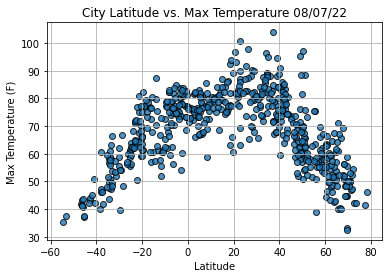

In [15]:
# Import time module

import time

# Build the scatter plot for latitude vs. max temperature.

plt.scatter(lats,
            
            max_temps,
            
            edgecolor="black", linewidths=1, marker="o",
            
            alpha=0.8, label="Cities")


# Incorporate the other graph properties.

plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))

plt.ylabel("Max Temperature (F)")

plt.xlabel("Latitude")

plt.grid(True)

# Save the figure.

plt.savefig("weather_data/Fig1.png")

# Show plot.

plt.show()

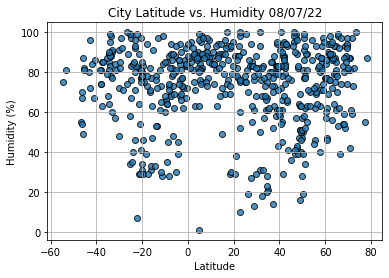

In [16]:
# Build the scatter plots for latitude vs. humidity.

plt.scatter(lats,
            
            humidity,
            
            edgecolor="black", linewidths=1, marker="o",
            
            alpha=0.8, label="Cities")


# Incorporate the other graph properties.

plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))

plt.ylabel("Humidity (%)")

plt.xlabel("Latitude")

plt.grid(True)

# Save the figure.

plt.savefig("weather_data/Fig2.png")

# Show plot.

plt.show()

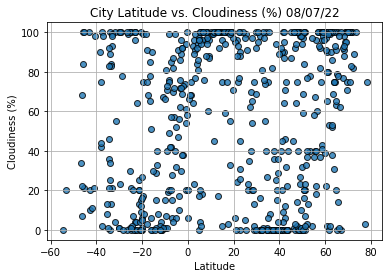

In [17]:
# Build the scatter plots for latitude vs. cloudiness.

plt.scatter(lats,
            
            cloudiness,
            
            edgecolor="black", linewidths=1, marker="o",
            
            alpha=0.8, label="Cities")


# Incorporate the other graph properties.

plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))

plt.ylabel("Cloudiness (%)")

plt.xlabel("Latitude")

plt.grid(True)

# Save the figure.

plt.savefig("weather_data/Fig3.png")

# Show plot.

plt.show()

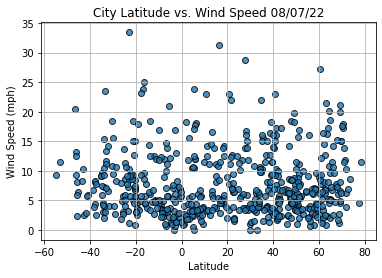

In [18]:
# Build the scatter plots for latitude vs. wind speed.

plt.scatter(lats,
            
            wind_speed,
            
            edgecolor="black", linewidths=1, marker="o",
            
            alpha=0.8, label="Cities")


# Incorporate the other graph properties.

plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))

plt.ylabel("Wind Speed (mph)")

plt.xlabel("Latitude")

plt.grid(True)

# Save the figure.

plt.savefig("weather_data/Fig4.png")

# Show plot.

plt.show()